# Timeseries

In [1]:
import numpy as np
import pandas as pd

## Dates and Times in Python

### Native Python dates and times: datetime

In [3]:
from datetime import datetime
dt = datetime(year=2019, month=7, day=4)
print(type(dt))
print(dt)

<class 'datetime.datetime'>
2019-07-04 00:00:00


---

In [4]:
dt = datetime.now()
print(dt)

2023-03-15 18:21:46.246847


---

https://www.epochconverter.com/

In [6]:
from datetime import date
ts = date.fromtimestamp(1678900946)
print(ts)

2023-03-15


---


[Format codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [8]:
date_string = "21 June, 2018"

date_object = datetime.strptime(date_string, "%d %B, %Y")
print(date_object)

2018-06-21 00:00:00


In [22]:
now = datetime.now()

t = now.strftime("%d %B, %Y")
print(t)
print(type(t))

s1 = now.strftime("%H:%M:%S")
print(s1)

s2 = now.strftime("%d/%m/%YT%H:%M:%S")
print(s2)

15 March, 2023
<class 'str'>
18:29:11
15/03/2023T18:29:11


---

## Typed arrays of times: NumPy's datetime64

In [27]:
import numpy as np
date = np.array("2015-07-04", dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [28]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

---

In [32]:
dt = np.datetime64("2015-07-04")
dt + np.arange(3)

array(['2015-07-04', '2015-07-05', '2015-07-06'], dtype='datetime64[D]')

In [33]:
dt = np.datetime64("2015-07-04 12:00")
dt + np.arange(3)

array(['2015-07-04T12:00', '2015-07-04T12:01', '2015-07-04T12:02'],
      dtype='datetime64[m]')

In [36]:
dt = np.datetime64("2015-07-04 12:00", "ns")
dt + np.arange(3)

array(['2015-07-04T12:00:00.000000000', '2015-07-04T12:00:00.000000001',
       '2015-07-04T12:00:00.000000002'], dtype='datetime64[ns]')

<div class="cell border-box-sizing text_cell rendered"><div class="prompt input_prompt">
</div>
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<table>
<thead><tr>
<th>Code</th>
<th>Meaning</th>
<th>Time span (relative)</th>
<th>Time span (absolute)</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>Y</code></td>
<td>Year</td>
<td>± 9.2e18 years</td>
<td>[9.2e18 BC, 9.2e18 AD]</td>
</tr>
<tr>
<td><code>M</code></td>
<td>Month</td>
<td>± 7.6e17 years</td>
<td>[7.6e17 BC, 7.6e17 AD]</td>
</tr>
<tr>
<td><code>W</code></td>
<td>Week</td>
<td>± 1.7e17 years</td>
<td>[1.7e17 BC, 1.7e17 AD]</td>
</tr>
<tr>
<td><code>D</code></td>
<td>Day</td>
<td>± 2.5e16 years</td>
<td>[2.5e16 BC, 2.5e16 AD]</td>
</tr>
<tr>
<td><code>h</code></td>
<td>Hour</td>
<td>± 1.0e15 years</td>
<td>[1.0e15 BC, 1.0e15 AD]</td>
</tr>
<tr>
<td><code>m</code></td>
<td>Minute</td>
<td>± 1.7e13 years</td>
<td>[1.7e13 BC, 1.7e13 AD]</td>
</tr>
<tr>
<td><code>s</code></td>
<td>Second</td>
<td>± 2.9e12 years</td>
<td>[ 2.9e9 BC, 2.9e9 AD]</td>
</tr>
<tr>
<td><code>ms</code></td>
<td>Millisecond</td>
<td>± 2.9e9 years</td>
<td>[ 2.9e6 BC, 2.9e6 AD]</td>
</tr>
<tr>
<td><code>us</code></td>
<td>Microsecond</td>
<td>± 2.9e6 years</td>
<td>[290301 BC, 294241 AD]</td>
</tr>
<tr>
<td><code>ns</code></td>
<td>Nanosecond</td>
<td>± 292 years</td>
<td>[ 1678 AD, 2262 AD]</td>
</tr>
<tr>
<td><code>ps</code></td>
<td>Picosecond</td>
<td>± 106 days</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td><code>fs</code></td>
<td>Femtosecond</td>
<td>± 2.6 hours</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
<tr>
<td><code>as</code></td>
<td>Attosecond</td>
<td>± 9.2 seconds</td>
<td>[ 1969 AD, 1970 AD]</td>
</tr>
</tbody>
</table>

</div>
</div>
</div>

In [38]:
dt = np.datetime64("2262-01-01", "ns")
print(dt)

dt2 = np.datetime64("2263-01-01", "ns")
print(dt2)

2262-01-01T00:00:00.000000000
1678-06-12T00:25:26.290448384


## Dates and times in pandas: best of both worlds

<table class="table">
<colgroup>
<col style="width: 15%">
<col style="width: 12%">
<col style="width: 13%">
<col style="width: 31%">
<col style="width: 28%">
</colgroup>
<thead>
<tr class="row-odd"><th class="head"><p>Concept</p></th>
<th class="head"><p>Scalar Class</p></th>
<th class="head"><p>Array Class</p></th>
<th class="head"><p>pandas Data Type</p></th>
<th class="head"><p>Primary Creation Method</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>Date times</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timestamp</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DatetimeIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">datetime64[ns]</span></code> or <code class="docutils literal notranslate"><span class="pre">datetime64[ns,</span> <span class="pre">tz]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_datetime</span></code> or <code class="docutils literal notranslate"><span class="pre">date_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Time deltas</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Timedelta</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">TimedeltaIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">timedelta64[ns]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">to_timedelta</span></code> or <code class="docutils literal notranslate"><span class="pre">timedelta_range</span></code></p></td>
</tr>
<tr class="row-even"><td><p>Time spans</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">PeriodIndex</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">period[freq]</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">Period</span></code> or <code class="docutils literal notranslate"><span class="pre">period_range</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>Date offsets</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">None</span></code></p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">DateOffset</span></code></p></td>
</tr>
</tbody>
</table>

In [39]:
import pandas as pd

date = pd.to_datetime("4th of July, 2015")
print(type(date))
print(date)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2015-07-04 00:00:00


In [40]:
date.strftime("%d %B, %Y")

'04 July, 2015'

In [41]:
date + pd.to_timedelta(np.arange(12), "D")

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

---

In [42]:
pd.to_datetime("2018-01-15 3:45pm")

Timestamp('2018-01-15 15:45:00')

In [44]:
pd.to_datetime("7/8/1923", dayfirst=True)

Timestamp('1923-08-07 00:00:00')

In [45]:
dts = pd.to_datetime(["2018-01-05", "7/8/1952", "Oct 10, 1995"])
print(type(dts))
print(dts)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)


In [49]:
pd.to_datetime(["2/25/10", "8/6/17", "12/15/12"], format="%m/%d/%y")

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

### Pandas Time Series: Indexing by Time

In [51]:
index = pd.DatetimeIndex(["2014-07-04", "2014-08-04", "2015-07-04", "2015-08-04"])
data = pd.Series([0,1,2,3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [58]:
data["2014/07/04" : "2015/07/04"]

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [59]:
data["2014"]

2014-07-04    0
2014-08-04    1
dtype: int64

### Pandas Time Periods

In [61]:
dates = pd.to_datetime([datetime(2015, 7, 3), "4th of July, 2015", "20150705", "2015-Jul-06", "07-07-2015"])

print(type(dates))
print(dates)

dates.to_period("D")

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq=None)


PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
             '2015-07-07'],
            dtype='period[D]')

### Pandas Time Delta

In [63]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences

In [68]:
pd.date_range("2015-07-03", "2015-07-10")

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [69]:
pd.date_range("2015-07-03", periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [70]:
pd.date_range("2015-07-03", periods=8, freq="H")

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

---

In [72]:
pd.period_range("2015-07-03", periods=8, freq="D")

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
             '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
            dtype='period[D]')

In [73]:
pd.timedelta_range("1 day", periods=10, freq="D")

TimedeltaIndex([ '1 days',  '2 days',  '3 days',  '4 days',  '5 days',
                 '6 days',  '7 days',  '8 days',  '9 days', '10 days'],
               dtype='timedelta64[ns]', freq='D')

----

## Frequencies

In [74]:
pd.date_range("1998-03-10", "1998-03-15", freq="D")

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

<table>
<thead><tr>
<th>Code</th>
<th>Description</th>
<th>Code</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>D</code></td>
<td>Calendar day</td>
<td><code>B</code></td>
<td>Business day</td>
</tr>
<tr>
<td><code>W</code></td>
<td>Weekly</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>M</code></td>
<td>Month end</td>
<td><code>BM</code></td>
<td>Business month end</td>
</tr>
<tr>
<td><code>Q</code></td>
<td>Quarter end</td>
<td><code>BQ</code></td>
<td>Business quarter end</td>
</tr>
<tr>
<td><code>A</code></td>
<td>Year end</td>
<td><code>BA</code></td>
<td>Business year end</td>
</tr>
<tr>
<td><code>H</code></td>
<td>Hours</td>
<td><code>BH</code></td>
<td>Business hours</td>
</tr>
<tr>
<td><code>T</code></td>
<td>Minutes</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>S</code></td>
<td>Seconds</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>L</code></td>
<td>Milliseonds</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>U</code></td>
<td>Microseconds</td>
<td></td>
<td></td>
</tr>
<tr>
<td><code>N</code></td>
<td>nanoseconds</td>
<td></td>
<td></td>
</tr>
</tbody>
</table>

<table>
<thead><tr>
<th>Code</th>
<th>Description</th>
<th></th>
<th>Code</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>MS</code></td>
<td>Month start</td>
<td></td>
<td><code>BMS</code></td>
<td>Business month start</td>
</tr>
<tr>
<td><code>QS</code></td>
<td>Quarter start</td>
<td></td>
<td><code>BQS</code></td>
<td>Business quarter start</td>
</tr>
<tr>
<td><code>AS</code></td>
<td>Year start</td>
<td></td>
<td><code>BAS</code></td>
<td>Business year start</td>
</tr>
</tbody>
</table>

In [75]:
pd.date_range("1998-03-10", "1998-03-15", freq="2H30T")

DatetimeIndex(['1998-03-10 00:00:00', '1998-03-10 02:30:00',
               '1998-03-10 05:00:00', '1998-03-10 07:30:00',
               '1998-03-10 10:00:00', '1998-03-10 12:30:00',
               '1998-03-10 15:00:00', '1998-03-10 17:30:00',
               '1998-03-10 20:00:00', '1998-03-10 22:30:00',
               '1998-03-11 01:00:00', '1998-03-11 03:30:00',
               '1998-03-11 06:00:00', '1998-03-11 08:30:00',
               '1998-03-11 11:00:00', '1998-03-11 13:30:00',
               '1998-03-11 16:00:00', '1998-03-11 18:30:00',
               '1998-03-11 21:00:00', '1998-03-11 23:30:00',
               '1998-03-12 02:00:00', '1998-03-12 04:30:00',
               '1998-03-12 07:00:00', '1998-03-12 09:30:00',
               '1998-03-12 12:00:00', '1998-03-12 14:30:00',
               '1998-03-12 17:00:00', '1998-03-12 19:30:00',
               '1998-03-12 22:00:00', '1998-03-13 00:30:00',
               '1998-03-13 03:00:00', '1998-03-13 05:30:00',
               '1998-03-

---

## The data

## Creating a time series DataFrame

In [76]:
opsd_daily = pd.read_csv("data/opsd_germany_daily.csv")
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [77]:
opsd_daily.shape

(4383, 5)

In [78]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


<div class="alert alert-block alert-info">
<b>Vaja:</b> 

Spremenite stolpec `Date` v datatip `datetime64[ns]`. To lahko dosežete s pomočjo `pd.to_datetime()` metode.
</div>

In [80]:
opsd_daily["Date"] = pd.to_datetime(opsd_daily["Date"], format="%Y-%m-%d")

In [81]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [83]:
opsd_daily = opsd_daily.set_index("Date")
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


---

In [84]:
opsd_daily = pd.read_csv("data/opsd_germany_daily.csv", index_col="Date", parse_dates=True)
print(opsd_daily.info())
opsd_daily.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB
None


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


---

In [91]:
opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily["Weekday name"] = opsd_daily.index.day_name()

In [92]:
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


---

In [93]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [96]:
time_sample = pd.to_datetime(["2013-02-03", "2013-02-06", "2013-02-08"])

consum_sample = opsd_daily.loc[time_sample, ["Consumption"]].copy()
print(consum_sample.index)
consum_sample

DatetimeIndex(['2013-02-03', '2013-02-06', '2013-02-08'], dtype='datetime64[ns]', freq=None)


,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [97]:
consum_freq = consum_sample.asfreq("D")
consum_freq

,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,1433.098


In [99]:
consum_sample.asfreq("D", method="ffill")

,Consumption
2013-02-03,1109.639
2013-02-04,1109.639
2013-02-05,1109.639
2013-02-06,1451.449
2013-02-07,1451.449
2013-02-08,1433.098


---

## Time-based indexing

In [100]:
opsd_daily.loc["2017-08-10"]

Consumption     1351.491
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

In [103]:
opsd_daily.loc["2014-05-13": "2014-12-31"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday name
Date,,,,,,,
2014-05-13,1471.536,136.822,120.052,256.874,2014,5,Tuesday
2014-05-14,1473.900,155.534,144.885,300.419,2014,5,Wednesday
2014-05-15,1468.244,77.979,113.941,191.920,2014,5,Thursday
2014-05-16,1430.868,100.726,159.432,260.158,2014,5,Friday
2014-05-17,1206.499,68.244,135.701,203.945,2014,5,Saturday
...,...,...,...,...,...,...,...
2014-12-27,1198.834,249.906,7.521,257.427,2014,12,Saturday
2014-12-28,1168.079,137.846,15.524,153.370,2014,12,Sunday
2014-12-29,1316.093,148.966,5.221,154.187,2014,12,Monday


In [105]:
opsd_daily.loc["2006"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2006-12-27,1284.676,NaN,NaN,NaN,2006,12,Wednesday
2006-12-28,1314.603,NaN,NaN,NaN,2006,12,Thursday
2006-12-29,1274.646,NaN,NaN,NaN,2006,12,Friday


In [110]:
opsd_daily.loc["2006-02"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday name
Date,,,,,,,
2006-02-01,1582.134,NaN,NaN,NaN,2006,2,Wednesday
2006-02-02,1595.717,NaN,NaN,NaN,2006,2,Thursday
2006-02-03,1577.786,NaN,NaN,NaN,2006,2,Friday
2006-02-04,1366.322,NaN,NaN,NaN,2006,2,Saturday
2006-02-05,1258.013,NaN,NaN,NaN,2006,2,Sunday
2006-02-06,1557.525,NaN,NaN,NaN,2006,2,Monday
2006-02-07,1606.667,NaN,NaN,NaN,2006,2,Tuesday
2006-02-08,1590.896,NaN,NaN,NaN,2006,2,Wednesday
2006-02-09,1599.129,NaN,NaN,NaN,2006,2,Thursday


---

## Visualizing time series data

In [111]:
# Display figures inline in Jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt

In [113]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

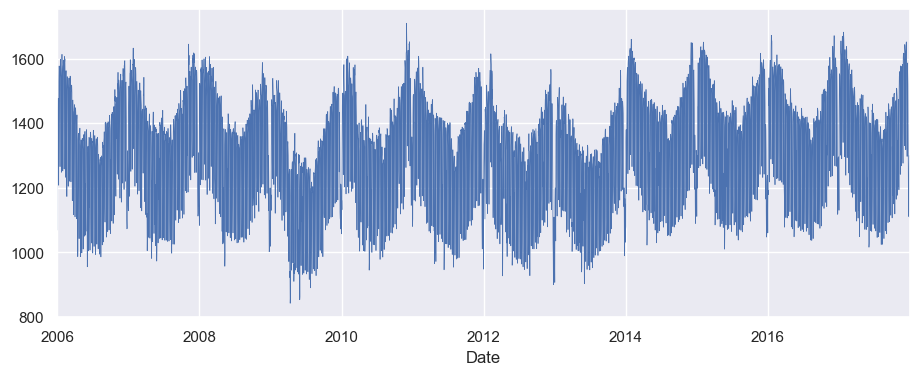

In [118]:
opsd_daily["Consumption"].plot(linewidth=0.5)
plt.show()

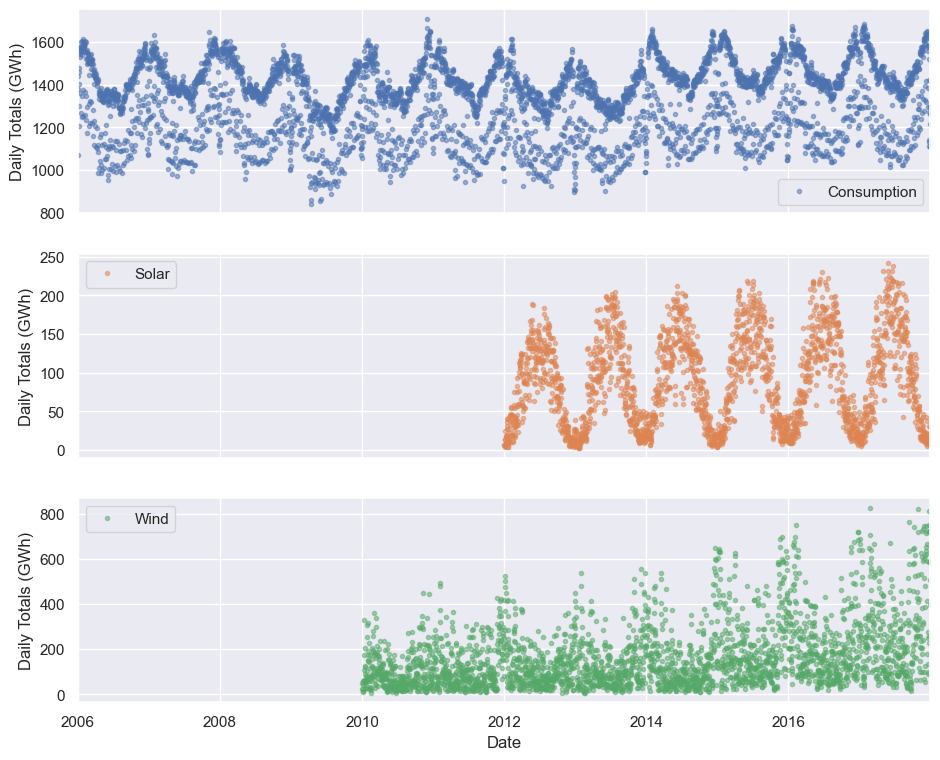

In [120]:
cols_plot = ['Consumption', 'Solar', 'Wind']

axes = opsd_daily[cols_plot].plot(marker='.', 
                                  alpha=0.5, 
                                  linestyle='None',
                                  figsize=(11, 9),
                                  subplots=True)

for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')
    
plt.show()    

---

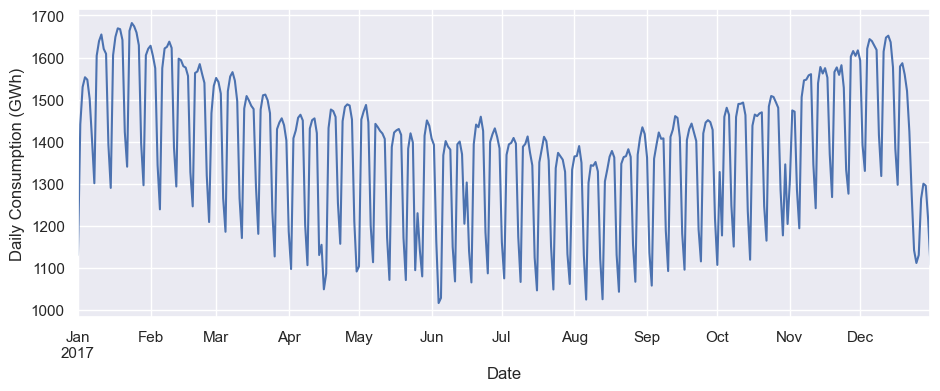

In [121]:
ax = opsd_daily.loc["2017", "Consumption"].plot()
ax.set_ylabel("Daily Consumption (GWh)")

plt.show()

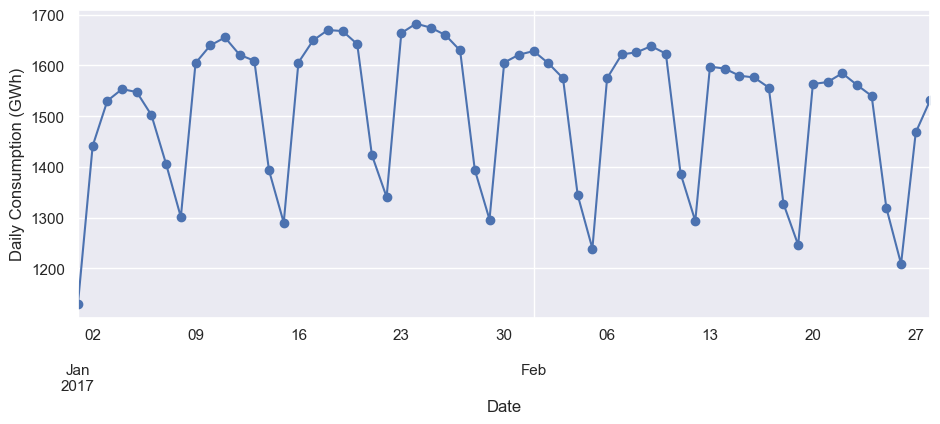

In [123]:
ax = opsd_daily.loc["2017-01" : "2017-02", "Consumption"].plot(marker="o")
ax.set_ylabel("Daily Consumption (GWh)")

plt.show()

## Customizing time series plots

In [126]:
import matplotlib.dates as mdates

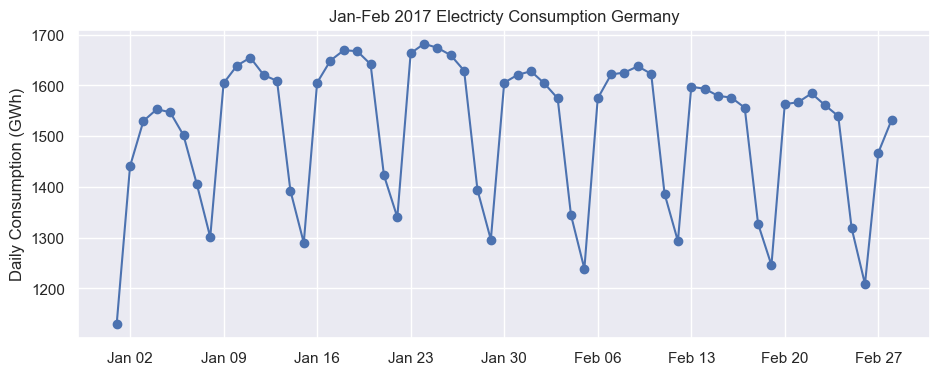

In [127]:
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc["2017-01":"2017-02", "Consumption"], marker="o")
ax.set_ylabel("Daily Consumption (GWh)")
ax.set_title("Jan-Feb 2017 Electricty Consumption Germany")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))

plt.show()

## Seasonality

<img src="images/1_NRlqiZGQdsIyAu0KzP7LaQ.png">

---

---

## Resampling

<div class="alert alert-block alert-info">
<b>Vaja:</b> 

Grafično prikažite sedaj tedenski **Solar** timeseries skupaj z dnevnim za čas trajanja od `2017-01` do `2017-06`.
</div>

![vaja](./images/vaja.png)

<div class="alert alert-block alert-info">
<b>Vaja:</b> 

Dodajte stolpev, ki pove koliko procentov porabljene energije je bilo proizvedeno iz veterne+sončne energije. Prikažite te procente v stolpične diagramu od leta 2012 dalje.
</div>

![vaja2.png](./images/vaja2.png)

---

## Rolling windows

<img src="images/rollingwindow.png">

## Trends